In [1]:
import pandas as pd 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('online.csv')

In [3]:
df.sample(10)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
23949,479738,577175,23344,JUMBO BAG 50'S CHRISTMAS,10,2011-11-18 10:58:00,2.08,14849,United Kingdom
38959,110358,545685,22557,PLASTERS IN TIN VINTAGE PAISLEY,1,2011-03-06 11:55:00,1.65,14499,United Kingdom
64944,276991,561085,47566,PARTY BUNTING,12,2011-07-25 09:26:00,4.95,14367,United Kingdom
25566,213745,555554,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2011-06-05 13:46:00,2.55,13742,United Kingdom
67542,63354,541566,22108,PING! MICROWAVE PLATE,8,2011-01-19 11:50:00,1.25,17722,United Kingdom
18015,53219,540826,22887,NUMBER TILE VINTAGE FONT 8,12,2011-01-11 14:00:00,0.42,13102,United Kingdom
33842,213169,555524,23174,REGENCY SUGAR BOWL GREEN,2,2011-06-05 11:37:00,4.15,16923,United Kingdom
1549,31950,539034,47591D,PINK FAIRY CAKE CHILDRENS APRON,5,2010-12-15 14:29:00,1.95,16161,United Kingdom
23154,124070,546950,22979,PANTRY WASHING UP BRUSH,1,2011-03-18 11:24:00,1.45,16511,United Kingdom
59228,158064,550272,22995,TRAVEL CARD WALLET SUKI,192,2011-04-15 12:14:00,0.42,18079,United Kingdom


In [4]:
df['CustomerID'].nunique()

3701

In [5]:
df.shape

(70864, 9)

In [6]:
df.isna().sum()

Unnamed: 0     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70864 non-null  int64  
 1   InvoiceNo    70864 non-null  int64  
 2   StockCode    70864 non-null  object 
 3   Description  70864 non-null  object 
 4   Quantity     70864 non-null  int64  
 5   InvoiceDate  70864 non-null  object 
 6   UnitPrice    70864 non-null  float64
 7   CustomerID   70864 non-null  int64  
 8   Country      70864 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [8]:
df.describe()

,Unnamed: 0,InvoiceNo,Quantity,UnitPrice,CustomerID
count,70864.000000,70864.000000,70864.000000,70864.000000,70864.00000
mean,278797.962590,560639.843136,11.511233,3.063033,15552.19790
std,153606.252964,13176.494003,41.017582,31.894970,1595.50593
min,3.000000,536365.000000,1.000000,0.001000,12747.00000
25%,147667.250000,549128.000000,2.000000,1.250000,14194.00000
50%,286056.000000,562012.500000,4.000000,1.950000,15525.00000
75%,412258.750000,572283.000000,12.000000,3.750000,16931.00000
max,541893.000000,581586.000000,4300.000000,8142.750000,18287.00000


# cohort analysis

group customers by acquisition month 

In [9]:
#assign acquisition month cohort
#to get the month of customer's first purchase (acquisition month)
df['InvoiceDate'] = df['InvoiceDate'].apply(pd.to_datetime)
def get_month(date):
    return dt.datetime(date.year , date.month , 1)

df['invoice_month'] = df['InvoiceDate'].apply(get_month)
#all month's purchases made by each customer
grouped = df.groupby('CustomerID')['invoice_month'] 
#month of acquisition (first purchase for this customer)
df['cohort_month'] = grouped.transform('min')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_month,cohort_month
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


create index for each customer indicating to number of months since acquisition 

In [10]:
def get_int(frame , col):
    year = frame[col].dt.year
    month = frame[col].dt.month
    day = frame[col].dt.day
    return year , month , day

inv_year , inv_mon , _ = get_int(df,'invoice_month')
co_year , co_mon , _ = get_int(df,'cohort_month')

years = inv_year - co_year
months = inv_mon - co_mon

df['cohort_index'] = (years * 12) + months + 1

df.head()


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_month,cohort_month,cohort_index
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


after we prepared data for pivoting , now we can measure some metrics like number of customers in each cohort

In [11]:
grouped = df.groupby(['cohort_month','cohort_index'])
cohort_data = grouped['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
count_pivot = cohort_data.pivot(index = 'cohort_month',columns = 'cohort_index' , values = 'CustomerID')
count_pivot

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


measuring retention rate

In [12]:
#store the first column of count_pivot as the cohort size 
size = count_pivot.iloc[:,0]
#divide all values by the size 
retention_rate = count_pivot.divide(size , axis = 0)
retention_rate.round(3) * 100

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


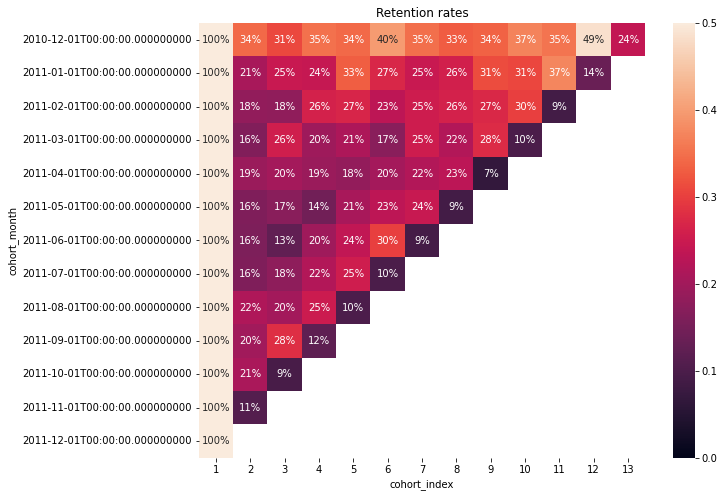

In [13]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention_rate,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'rocket')
plt.show()